In [7]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

In [100]:
digits = datasets.load_digits()
type(digits)


sklearn.utils.Bunch

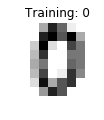

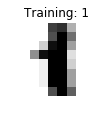

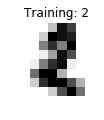

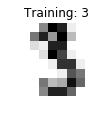

In [17]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    plt.show()


In [18]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [20]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1 

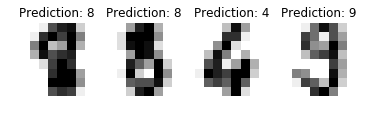

In [23]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

In [47]:
res = metrics.confusion_matrix(expected, predicted)
res

array([[87,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 88,  1,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 85,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 79,  0,  3,  0,  4,  5,  0],
       [ 0,  0,  0,  0, 88,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0, 88,  1,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 90,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 88,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 88,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 90]], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(expected, predicted)

0.9688542825361512

In [68]:
# from sklearn.metrics import classification_report
import pandas as pd
h=list(classification_report(expected, predicted))
k=pd.DataFrame(h)
k.values.reshape(2, 319)

array([[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        'p', 'r', 'e', 'c', 'i', 's', 'i', 'o', 'n', ' ', ' ', ' ', ' ',
        'r', 'e', 'c', 'a', 'l', 'l', ' ', ' ', 'f', '1', '-', 's', 'c',
        'o', 'r', 'e', ' ', ' ', ' ', 's', 'u', 'p', 'p', 'o', 'r', 't',
        '\n', '\n', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        '0', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '1', '.', '0', '0', ' ',
        ' ', ' ', ' ', ' ', ' ', '0', '.', '9', '9', ' ', ' ', ' ', ' ',
        ' ', ' ', '0', '.', '9', '9', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        ' ', '8', '8', '\n', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        ' ', '1', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '0', '.', '9', '9',
        ' ', ' ', ' ', ' ', ' ', ' ', '0', '.', '9', '7', ' ', ' ', ' ',
        ' ', ' ', ' ', '0', '.', '9', '8', ' ', ' ', ' ', ' ', ' ', ' ',
        ' ', ' ', '9', '1', '\n', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        ' ', ' ', '2', ' ', ' ', ' ', ' ', ' ', ' ',

In [80]:
df1 = pd.DataFrame(expected)
df2 = pd.DataFrame(expected)

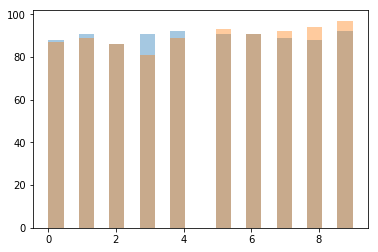

In [77]:
import seaborn as sns
sns.distplot(expected,bins=20,kde=False)
sns.distplot(predicted,bins=20,kde=False)
plt.show()

In [82]:
df1['pred'] = df2[0]

In [83]:
df1.head()

,0,pred
0,8,8
1,8,8
2,4,4
3,9,9
4,0,0


In [84]:
df1_numpy = df1.values

In [85]:
df1_numpy

array([[8, 8],
       [8, 8],
       [4, 4],
       ...,
       [8, 8],
       [9, 9],
       [8, 8]])

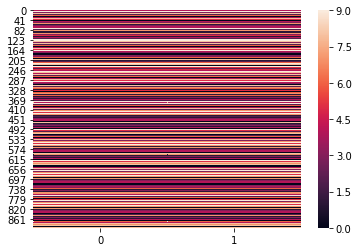

In [86]:

heat_map = sns.heatmap(df1_numpy)
plt.show()